In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [0]:
class ucmercevdataset(Dataset):
    def __init__(self,root_dir,folder_name,transform=None,train_test=None):
        self.root_dir= root_dir
        self.transform= transform
        self.train_test=train_test
        self.folder_name= folder_name
        self.imagefiles=[os.listdir(os.path.join(self.root_dir, i)) for i in folder_name]
        
    def __len__(self):
        return sum([len(folder) for folder in self.imagefiles])
    
    #def __getitem__(self, index):
    #    images = [(os.path.join(self.root_dir, i, self.imagefiles[i][index])) for i in folder_name_list]
    #    if self.transform is not None:
    #        images = [self.transform(img) for img in images]
    #    return self.imagesfiles
    
    def __getitem__(self, index):
        l=list()
   
        m=0
        for i,idx in enumerate(self.folder_name):
            n=len(self.imagefiles[m])
            m=m+1
            
            if self.train_test=='Train':
              for k in range(0,int(0.8*n)):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                
            elif self.train_test=='Test':
              for k in range(int(0.8*n),n):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                
            elif self.train_test==None:
              for k in range(n):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
 
                
        #images = [(os.path.join(self.root_dir, i, self.imagefiles[i][index])) for i in folder_name_list]
        #image=io.imread(l[index])
        image=Image.open(l[index])
        if self.transform is not None:
            image = self.transform(image)
        return image
    

In [0]:
folder_name_list=['airplane','baseballdiamond','beach','denseresidential','forest','mediumresidential','parkinglot','river','sparseresidential','storagetanks']
root='/content/gdrive/My Drive/Colab Notebooks/UCDOMAIN'
imagefiles=[os.listdir(os.path.join(root, i)) for i in folder_name_list ]

In [0]:
imagefiles

[['airplane00.tif',
  'airplane01.tif',
  'airplane03.tif',
  'airplane02.tif',
  'airplane04.tif',
  'airplane08.tif',
  'airplane05.tif',
  'airplane09.tif',
  'airplane06.tif',
  'airplane07.tif',
  'airplane10.tif',
  'airplane11.tif',
  'airplane14.tif',
  'airplane16.tif',
  'airplane12.tif',
  'airplane18.tif',
  'airplane15.tif',
  'airplane17.tif',
  'airplane13.tif',
  'airplane19.tif',
  'airplane20.tif',
  'airplane26.tif',
  'airplane27.tif',
  'airplane24.tif',
  'airplane29.tif',
  'airplane23.tif',
  'airplane21.tif',
  'airplane28.tif',
  'airplane22.tif',
  'airplane25.tif',
  'airplane30.tif',
  'airplane32.tif',
  'airplane31.tif',
  'airplane34.tif',
  'airplane33.tif',
  'airplane39.tif',
  'airplane37.tif',
  'airplane36.tif',
  'airplane35.tif',
  'airplane38.tif',
  'airplane40.tif',
  'airplane42.tif',
  'airplane41.tif',
  'airplane45.tif',
  'airplane47.tif',
  'airplane49.tif',
  'airplane46.tif',
  'airplane48.tif',
  'airplane44.tif',
  'airplane43.tif',


In [0]:
image_uc= ucmercevdataset('/content/gdrive/My Drive/Colab Notebooks/UCDOMAIN',folder_name_list,train_test='Train')

In [0]:
len(image_uc)

1000

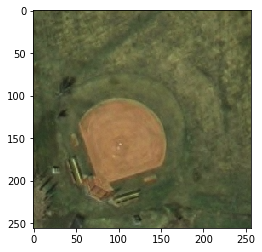

In [0]:
sample= image_uc[150]
plt.imshow(sample)
    

In [0]:
for i,idx in enumerate(folder_name_list):
    print(i,end=' ')
    print(idx)

0 airplane
1 baseballdiamond
2 beach
3 denseresidential
4 forest
5 mediumresidential
6 parkinglot
7 river
8 sparseresidential
9 storagetanks


In [0]:
from torchvision import models
model_ft = models.resnet50(pretrained=True)

In [0]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
model_ft.fc.in_features

2048

In [0]:
import torchvision.transforms as tvtf

tf= tvtf.Compose([
    tvtf.Resize(224),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

In [0]:
folder_name_list=['airplane','baseballdiamond','beach','denseresidential','forest','mediumresidential','parkinglot','river','sparseresidential','storagetanks']
root='/content/gdrive/My Drive/Colab Notebooks/UCDOMAIN'
ucmercev= ucmercevdataset(root,folder_name_list,transform=tf)

In [0]:
batch_size=1
dl_train= torch.utils.data.DataLoader(ucmercev,batch_size,shuffle=True)

In [0]:
for p in model_ft.parameters():
    p.requires_grad = False

In [0]:


def extract_features_da(model, dataloader):
    use_gpu =torch.cuda.is_available()
    if (use_gpu):
      model.cuda()
    features = None
    for i, data in enumerate(dataloader):
        inputs = data
        if (use_gpu):
            inputs = inputs.cuda()
        #inputs = Variable(inputs)
        torch.no_grad()
        model.eval()
        f_temp = model(inputs)
        print(i,end=' ')
        print(f_temp.size())
        if i==0:
            s= f_temp.size()
        if f_temp.size() != s:
            continue
        if i == 0:
            features = f_temp
        else:
            features = torch.cat((features, f_temp))
    features = features.data
    if use_gpu:
        features = features.cpu()
    return features

In [0]:
#f_da = extract_features_da(model_ft, dl_train)

In [0]:
#for img in iter(dl_train):
#    f=model_ft(img)

In [0]:
#f_da = extract_features_da(model_ft, dl_train)

In [0]:
res50_model = models.resnet50(pretrained=True)
res50_conv = nn.Sequential(*list(res50_model.children())[:-1])

In [0]:
res50_conv

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [0]:
for param in res50_conv.parameters():
    param.requires_grad = False

In [0]:
f_da = extract_features_da(res50_conv, dl_train)

0 torch.Size([1, 2048, 1, 1])
1 torch.Size([1, 2048, 1, 1])
2 torch.Size([1, 2048, 1, 1])
3 torch.Size([1, 2048, 1, 1])
4 torch.Size([1, 2048, 1, 1])
5 torch.Size([1, 2048, 1, 1])
6 torch.Size([1, 2048, 1, 1])
7 torch.Size([1, 2048, 1, 1])
8 torch.Size([1, 2048, 1, 1])
9 torch.Size([1, 2048, 1, 1])
10 torch.Size([1, 2048, 1, 1])
11 torch.Size([1, 2048, 1, 1])
12 torch.Size([1, 2048, 1, 1])
13 torch.Size([1, 2048, 1, 1])
14 torch.Size([1, 2048, 1, 1])
15 torch.Size([1, 2048, 1, 1])
16 torch.Size([1, 2048, 1, 1])
17 torch.Size([1, 2048, 1, 1])
18 torch.Size([1, 2048, 1, 1])
19 torch.Size([1, 2048, 1, 1])
20 torch.Size([1, 2048, 1, 1])
21 torch.Size([1, 2048, 1, 1])
22 torch.Size([1, 2048, 1, 1])
23 torch.Size([1, 2048, 1, 1])
24 torch.Size([1, 2048, 1, 1])
25 torch.Size([1, 2048, 1, 1])
26 torch.Size([1, 2048, 1, 1])
27 torch.Size([1, 2048, 1, 1])
28 torch.Size([1, 2048, 1, 1])
29 torch.Size([1, 2048, 1, 1])
30 torch.Size([1, 2048, 1, 1])
31 torch.Size([1, 2048, 1, 1])
32 torch.Size([1, 

In [0]:
f_da[0].shape

torch.Size([2048, 1, 1])

In [0]:
folder_name_list_AID=['Airport','BaseballField','Beach','DenseResidential','Forest','MediumResidential','Parking','River','SparseResidential','StorageTanks']
root_AID='/content/gdrive/My Drive/AID DOMAIN'
AID= ucmercevdataset(root_AID,folder_name_list_AID,transform=tf)

In [0]:
#f_da.size()

In [0]:
batch_size=1 
dl_train_AID= torch.utils.data.DataLoader(AID,batch_size,shuffle=True)
len(dl_train_AID)

3390

In [0]:
imagefiles=[os.listdir(os.path.join(root_AID, i)) for i in folder_name_list_AID]
imagefiles[0][0]

'airport_10.jpg'

In [0]:
f_da_AID = extract_features_da(res50_conv,dl_train_AID)

0 torch.Size([1, 2048, 1, 1])
1 torch.Size([1, 2048, 1, 1])
2 torch.Size([1, 2048, 1, 1])
3 torch.Size([1, 2048, 1, 1])
4 torch.Size([1, 2048, 1, 1])
5 torch.Size([1, 2048, 1, 1])
6 torch.Size([1, 2048, 1, 1])
7 torch.Size([1, 2048, 1, 1])
8 torch.Size([1, 2048, 1, 1])
9 torch.Size([1, 2048, 1, 1])
10 torch.Size([1, 2048, 1, 1])
11 torch.Size([1, 2048, 1, 1])
12 torch.Size([1, 2048, 1, 1])
13 torch.Size([1, 2048, 1, 1])
14 torch.Size([1, 2048, 1, 1])
15 torch.Size([1, 2048, 1, 1])
16 torch.Size([1, 2048, 1, 1])
17 torch.Size([1, 2048, 1, 1])
18 torch.Size([1, 2048, 1, 1])
19 torch.Size([1, 2048, 1, 1])
20 torch.Size([1, 2048, 1, 1])
21 torch.Size([1, 2048, 1, 1])
22 torch.Size([1, 2048, 1, 1])
23 torch.Size([1, 2048, 1, 1])
24 torch.Size([1, 2048, 1, 1])
25 torch.Size([1, 2048, 1, 1])
26 torch.Size([1, 2048, 1, 1])
27 torch.Size([1, 2048, 1, 1])
28 torch.Size([1, 2048, 1, 1])
29 torch.Size([1, 2048, 1, 1])
30 torch.Size([1, 2048, 1, 1])
31 torch.Size([1, 2048, 1, 1])
32 torch.Size([1, 

In [0]:
# l=list()
# m=0
# for i,idx in enumerate(folder_name_list):
#     n=len(imagefiles[m])
#     m=m+1
#     for k in range(n):
#         image_name=os.path.join(root, idx, imagefiles[i][k])
#         l.append(image_name)

In [0]:
features_AID=f_da_AID.reshape(-1,2048*1*1)
features_UCM=f_da.reshape(-1,2048*1*1)

In [0]:
import matplotlib.pyplot as plt

from sklearn import manifold
%matplotlib inline

In [0]:
import numpy
from sklearn.manifold import TSNE
import seaborn as sn

In [0]:
# def visualize_da(source, target, perplexity=50, sample_num=None, save=None):
#     source_num = source.shape[0]
#     target_num = target.shape[0]
#     labels1=numpy.ones(source_num.shape[0])
#     labels0=numpy.zeros(target_num.shape[0])
#     if sample_num:
#         source, target = source[:sample_num, :], target[:sample_num, :]
#         labels1, labels0 = labels1[:sample_num, :], labels0[:sample_num, :]
        
#     data = np.vstack((source, target))
#     labels= np.vstack((labels1, labels0))

#     tsne = manifold.TSNE(n_components=2, init='random',
#                          random_state=0, perplexity=perplexity)
#     X = tsne.fit_transform(data)
#     plt.scatter(X[:sample_num, 0], X[:sample_num, 1], c="blue", edgecolors=None, alpha=0.4)
#     plt.scatter(X[sample_num:, 0], X[sample_num:, 1], c="red", edgecolors=None, alpha=0.4)
#     plt.axis("off")
#     if save:
#         plt.savefig(save)
#     plt.figure(figsize=(100,100))
#     plt.show()
#     plt.clf()
#     plt.close()

In [0]:
def visualise(sample_num,source=features_UCM,target=features_AID):
    
    sample_num=sample_num
    source_num = source.shape[0]
    target_num = target.shape[0]
    labels1=numpy.ones(source_num)
    labels0=numpy.zeros(target_num)
    if sample_num:
      features_UCM, features_AID = source[:sample_num,:], target[:sample_num,:]
      labels1, labels0 = labels1[:sample_num], labels0[:sample_num]
        
    data = np.vstack((features_UCM, features_AID))
    labels= np.vstack((labels1.T, labels0.T))
    print(data.shape, labels.shape)
    labels=labels.reshape(sample_num*2,-1)
    
   
    
    model= TSNE(n_components=2,random_state=0,perplexity=50, n_iter=2000)
    tsne_data= model.fit_transform(data)
    tsne_data=np.vstack((tsne_data.T,labels.T)).T
    tsne_df=pd.DataFrame(data=tsne_data,columns=('dim1','dim2','labels'))
    
    sn.FacetGrid(tsne_df,hue='labels',size=10).map(plt.scatter,'dim1','dim2').add_legend()
    plt.show
    plt.title('Domain Difference Plot of UC Merced and AID datasets')

(2000, 2048) (2, 1000)


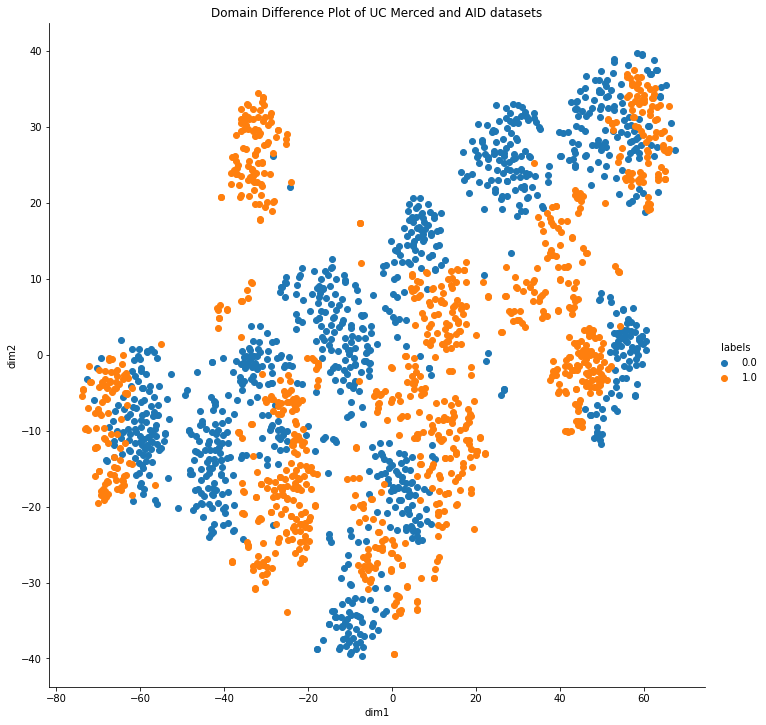

In [0]:
visualise(sample_num=1000)

In [0]:
plt.savefig('./MNIST_to_MNIST_M_features_50Adapted.png')

<Figure size 432x288 with 0 Axes>

In [0]:
# def visualize_da(source, target, perplexity=50, sample_num=None, save=None):
#     from sklearn.manifold import TSNE
#     import seaborn as sn
#     source_num = source.shape[0]
#     target_num = target.shape[0]
#     labels1=numpy.ones(source_num)
#     labels0=numpy.zeros(target_num)
#     if sample_num:
#         source, target = source[:sample_num], target[:sample_num]
#         labels1, labels0 = labels1[:sample_num], labels0[:sample_num]
        
#     data = np.vstack((source, target))
#     labels= np.vstack((labels1, labels0))
    
#     model= TSNE(n_components=2,random_state=0)
#     tsne_data= model.fit_transform(data)
#     tsne_data=np.vstack((tsne_data.T,labels)).T
#     tsne_df=pd.DataFrame(data=tsne_data,columns=('dim1','dim2','labels'))
    
#     sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'dim1','dim2')
#     plt.show

#     #tsne = manifold.TSNE(n_components=2, init='random',
#     #                     random_state=0, perplexity=perplexity)
#     #X = tsne.fit_transform(data)
#     #plt.scatter(X[:sample_num, 0], X[:sample_num, 1], c="blue", edgecolors=None, alpha=0.4)
#     #plt.scatter(X[sample_num:, 0], X[sample_num:, 1], c="red", edgecolors=None, alpha=0.4)
#     #plt.axis("off")
#     #if save:
#     #    plt.savefig(save)
#     #plt.figure(figsize=(100,100))
#     #plt.show()
#     #plt.clf()
#     #plt.close()

In [0]:
# visualize_da(features_UCM.numpy(), features_AID.numpy(), perplexity=5, sample_num=50,            save="./MNIST_to_MNIST_M_features_50Adapted.svg")

In [0]:
# visualize_da(features_UCM.numpy(), features_AID.numpy(), perplexity=35, sample_num=100,
             save="./MNIST_to_MNIST_M_features_100Adapted.svg")

SyntaxError: ignored

In [0]:
# visualize_da(features_UCM.numpy(), features_AID.numpy(), perplexity=50, sample_num=200,
             save="./MNIST_to_MNIST_M_features_200Adapted.svg")

In [0]:
# visualize_da(features_UCM.numpy(), features_AID.numpy(), perplexity=50, sample_num=1000,
             save="./MNIST_to_MNIST_M_features_1000Adapted.svg")